In [1]:
#!pip install requests
#!pip install matplotlib
#!pip install pillow
#!pip install numpy

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import requests
from io import BytesIO


In [3]:
endpoints = {
    'ecotrust': 'https://arcgis.ecotrust.org/server/rest/services/Landmapper/Streams/MapServer',
    'noaa': 'https://coast.noaa.gov/arcgis/rest/services/OceanReports/WindSpeedAndDirection/MapServer',
    #'naip': 'https://naip.maptiles.arcgis.com/arcgis/rest/services/NAIP/MapServer',
    'satellite': 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer',
    #'topo': 'https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryTopo/MapServer',
    'topo': 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer',
    #'tnm': 'https://services.nationalmap.gov/arcgis/rest/services/USGSNAIPPlus/MapServer',
    'street': 'https://server.arcgisonline.com/arcgis/rest/services/World_Street_Map/MapServer'
}
params = {
    'BBOX': '-1.3803006309370652E7,5408329.32956264,-1.3797921517824095E7,5413018.435183838',
    'BBOXSR': '102100',
    'LAYERS': 'show:0',
    'TRANSPARENT': 'true',
    'F': 'image',
    'FORMAT': 'PNG32',
    'DPI':"96",
    'SIZE':"400,400",
    'IMAGESR':'3857'
}

ecotrust_url = '/'.join([endpoints['ecotrust'], "export"])
ecotrust_pem = './staticfiles/arcgis-ecotrust-org.pem'

noaa_url = '/'.join([endpoints['noaa'], "export"])
test_params = {
    'SIZE':'1024,1024',
    'BBOX':'-14401959.12137977,4383204.9499851465,-13775786.985667607,5009377.08569731',
    'BBOXSR':3857,
    'IMAGESR':3857
}
for key in params.keys():
    if key not in test_params.keys():
        test_params[key] = params[key]

https://coast.noaa.gov/arcgis/rest/services/OceanReports/WindSpeedAndDirection/MapServer/export?SIZE=1024%2C1024&BBOX=-14401959.12137977%2C4383204.9499851465%2C-13775786.985667607%2C5009377.08569731&BBOXSR=3857&IMAGESR=3857&LAYERS=show%3A0&TRANSPARENT=true&F=image&FORMAT=PNG32&DPI=96


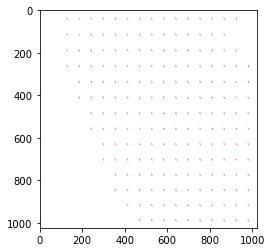

In [4]:
#external_url="https://coast.noaa.gov/arcgis/rest/services/OceanReports/WindSpeedAndDirection/MapServer"
#externalQS="export?"
#url = '/'.join([external_url, externalQS])
#maptile = requests.get(url)
testtile = requests.get(noaa_url, params=test_params)
print(testtile.url)
test_im = Image.open(BytesIO(testtile.content)) 
test_im_array = np.asarray(test_im)
plt.imshow(test_im_array)
plt.show()

https://arcgis.ecotrust.org/server/rest/services/Landmapper/Streams/MapServer/export?BBOX=-1.3803006309370652E7%2C5408329.32956264%2C-1.3797921517824095E7%2C5413018.435183838&BBOXSR=102100&LAYERS=show%3A0&TRANSPARENT=true&F=image&FORMAT=PNG32&DPI=96&SIZE=400%2C400&IMAGESR=3857


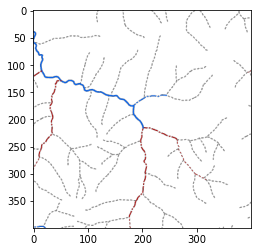

In [5]:
# From StackOverflow user Punnerud: https://stackoverflow.com/a/54744958

maptile = requests.get(ecotrust_url, params=params, verify=ecotrust_pem)
print(maptile.url)
stream_im = Image.open(BytesIO(maptile.content))
stream_im_array = np.asarray(stream_im)
plt.imshow(stream_im_array)
plt.show()

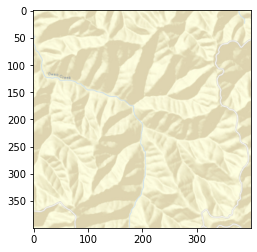

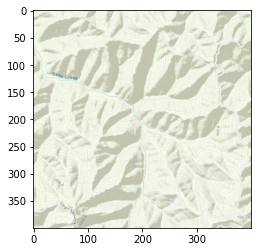

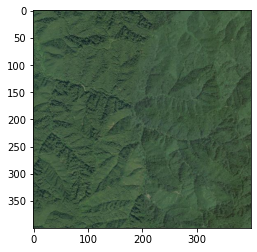

In [7]:
# Basemaps

streetTile = requests.get('/'.join([endpoints['street'], "export"]), params=params)
street_im = Image.open(BytesIO(streetTile.content))
street_im_array = np.asarray(street_im)
plt.imshow(street_im_array)
plt.show()

#TOPO
topoTile = requests.get('/'.join([endpoints['topo'], "export"]), params=params)
topo_im = Image.open(BytesIO(topoTile.content))
topo_im_array = np.asarray(topo_im)
plt.imshow(topo_im_array)
plt.show()

#Satellite
params['LAYERS'] = "show:2"
satTile = requests.get('/'.join([endpoints['satellite'], "export"]), params=params)
sat_im = Image.open(BytesIO(satTile.content))
sat_im_array = np.asarray(sat_im)
plt.imshow(sat_im_array)
plt.show()

#NAIP
#naipTile = requests.get('/'.join([endpoints['naip'], "export"]), params=params)
#naip_im = Image.open(BytesIO(naipTile.content))
#naip_im_array = np.asarray(naip_im)
#plt.imshow(naip_im_array)
#plt.show()


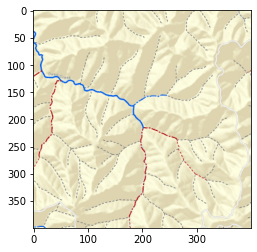

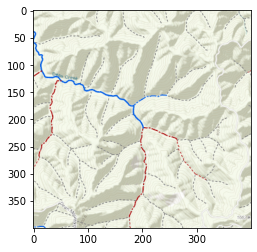

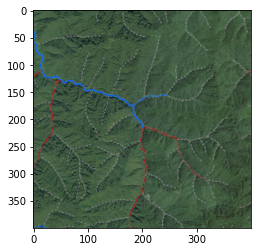

In [9]:
# Merge
street_map = street_im.copy()
street_map.paste(stream_im, (0,0), stream_im)
topo_map = topo_im.copy()
topo_map.paste(stream_im, (0,0), stream_im)
sat_map = sat_im.copy()
sat_map.paste(stream_im, (0,0), stream_im)
street_map_array = np.asarray(street_map)
topo_map_array = np.asarray(topo_map)
sat_map_array = np.asarray(sat_map)
plt.imshow(street_map_array)
plt.show()
plt.imshow(topo_map_array)
plt.show()
plt.imshow(sat_map_array)
plt.show()
